# Potential Function Testing and Visualization

This notebook creates a comprehensive 3D visualization of a potential function used for impedance control in robotics applications.

## Features:
- **3D Surface Plot**: Visualizes the potential function as a 3D surface with color coding based on gradient magnitude
- **2D Slice Visualization**: Shows a 2D cross-section of the potential function
- **Force Field Visualization**: Quiver plots showing the force vectors (negative gradient) in XY and XZ planes
- **Comprehensive Analysis**: Prints potential values, gradients, and field properties

## Potential Function Components:
- **Attractive Potential (Uatt)**: Draws the robot toward the goal position
- **Repulsive Potential (Urep)**: Pushes the robot away from obstacles
- **Total Potential**: U = Uatt + Urep
- **Force Field**: F = -∇U (negative gradient of potential)

## Color Coding:
- **Surface Colors**: Represent the magnitude of the gradient (force strength)
- **Red Marker**: Indicates the goal position
- **Arrows**: Show force direction and magnitude

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# Enable interactive 3D plotting in JupyterLab
# %matplotlib widget

In [2]:
# Define symbols and parameters
x, y, z = sp.symbols('x y z')

# Parameters
alpha = 100.0  # Potential field strength
goal_pos = np.array([0.0, 0.0, 0.0])  # Goal position (center of paraboloid)

# Paraboloid parameters
a = 1.0  # Paraboloid curvature parameter
b = 1.0  # Paraboloid curvature parameter

print(f"Goal Position: {goal_pos}")
print(f"Alpha (strength): {alpha}")
print(f"Paraboloid parameters: a={a}, b={b}")


Goal Position: [0. 0. 0.]
Alpha (strength): 100.0
Paraboloid parameters: a=1.0, b=1.0


In [3]:
# Define the potential function
# Attractive potential - draws robot toward goal
Uatt = alpha * ((x - goal_pos[0])**2 + (y - goal_pos[1])**2 + (z - goal_pos[2])**2)

# Repulsive potential - pushes robot away (negative for repulsion)
Urep = -0.25 * alpha * ((x - goal_pos[0])**2 + (y - goal_pos[1])**2 + (z - goal_pos[2])**2)

# Total potential function
U = Uatt + Urep

# Compute gradient (force field)
grad_U = [sp.diff(U, var) for var in (x, y, z)]

# Convert to numerical functions for fast computation
U_func = sp.lambdify((x, y, z), U, 'numpy')
grad_func = sp.lambdify((x, y, z), grad_U, 'numpy')

print("Potential function defined:")
print(f"Uatt = {Uatt}")
# print(f"Urep = {Urep}")
print(f"U = {U}")
print(f"Gradient: {grad_U}")


Potential function defined:
Uatt = 100.0*x**2 + 100.0*y**2 + 100.0*z**2
U = 75.0*x**2 + 75.0*y**2 + 75.0*z**2
Gradient: [150.0*x, 150.0*y, 150.0*z]


In [4]:
# Analyze potential field properties
print("Potential Function Analysis")
print("=" * 40)
print(f"Potential at goal: {U_func(goal_pos[0], goal_pos[1], goal_pos[2]):.6f}")

# Compute gradient at goal (should be zero)
grad_at_goal = grad_func(goal_pos[0], goal_pos[1], goal_pos[2])
print(f"Gradient at goal: {grad_at_goal}")
print(f"Gradient magnitude at goal: {np.linalg.norm(grad_at_goal):.6f}")

# Test at a few other points
test_points = [
    goal_pos + np.array([0.1, 0, 0]),
    goal_pos + np.array([0, 0.1, 0]),
    goal_pos + np.array([0, 0, 0.1]),
    goal_pos + np.array([0.1, 0.1, 0.1])
]

print("\nPotential and Gradient at Test Points:")
print("-" * 50)
for i, point in enumerate(test_points):
    potential = U_func(point[0], point[1], point[2])
    gradient = grad_func(point[0], point[1], point[2])
    grad_mag = np.linalg.norm(gradient)
    print(f"Point {i+1}: {point}")
    print(f"  Potential: {potential:.6f}")
    print(f"  Gradient: {gradient}")
    print(f"  Gradient Magnitude: {grad_mag:.6f}")
    print()


Potential Function Analysis
Potential at goal: 0.000000
Gradient at goal: [0.0, 0.0, 0.0]
Gradient magnitude at goal: 0.000000

Potential and Gradient at Test Points:
--------------------------------------------------
Point 1: [0.1 0.  0. ]
  Potential: 0.750000
  Gradient: [15.0, 0.0, 0.0]
  Gradient Magnitude: 15.000000

Point 2: [0.  0.1 0. ]
  Potential: 0.750000
  Gradient: [0.0, 15.0, 0.0]
  Gradient Magnitude: 15.000000

Point 3: [0.  0.  0.1]
  Potential: 0.750000
  Gradient: [0.0, 0.0, 15.0]
  Gradient Magnitude: 15.000000

Point 4: [0.1 0.1 0.1]
  Potential: 2.250000
  Gradient: [15.0, 15.0, 15.0]
  Gradient Magnitude: 25.980762



In [5]:
# Fixed 3D visualization of potential function
def create_3d_potential_plot_fixed():
    """Create a 3D visualization of the potential function with gradient-based coloring."""
    # Define the spatial grid for 2D slices
    x_range = np.linspace(goal_pos[0] - 1.0, goal_pos[0] + 1.0, 50)
    y_range = np.linspace(goal_pos[1] - 1.0, goal_pos[1] + 1.0, 50)
    z_range = np.linspace(goal_pos[2] - 1.0, goal_pos[2] + 1.0, 50)
    
    # Create the 3D plot
    fig = plt.figure(figsize=(18, 12))
    
    # Plot 1: 3D scatter plot with potential values
    ax1 = fig.add_subplot(221, projection='3d')
    
    # Create a 3D grid for scatter plot
    x_grid = np.linspace(goal_pos[0] - 1.0, goal_pos[0] + 1.0, 20)
    y_grid = np.linspace(goal_pos[1] - 1.0, goal_pos[1] + 1.0, 20)
    z_grid = np.linspace(goal_pos[2] - 1.0, goal_pos[2] + 1.0, 20)
    X_grid, Y_grid, Z_grid = np.meshgrid(x_grid, y_grid, z_grid, indexing='ij')
    
    # Compute potential values and gradients
    U_values = U_func(X_grid, Y_grid, Z_grid)
    grad_values = grad_func(X_grid, Y_grid, Z_grid)
    grad_magnitudes = np.sqrt(grad_values[0]**2 + grad_values[1]**2 + grad_values[2]**2)
    
    # Flatten for scatter plot
    X_flat = X_grid.flatten()
    Y_flat = Y_grid.flatten()
    Z_flat = Z_grid.flatten()
    U_flat = U_values.flatten()
    grad_flat = grad_magnitudes.flatten()
    
    # Create 3D scatter plot colored by gradient magnitude
    scatter = ax1.scatter(X_flat, Y_flat, Z_flat, c=grad_flat, cmap='viridis', alpha=0.6, s=20)
    
    # Add goal position marker
    ax1.scatter([goal_pos[0]], [goal_pos[1]], [goal_pos[2]], 
               color='red', s=200, label='Goal Position', marker='*')
    
    ax1.set_xlabel('X Position')
    ax1.set_ylabel('Y Position')
    ax1.set_zlabel('Z Position')
    ax1.set_title('Potential Function (3D Scatter)\nColor = Gradient Magnitude')
    ax1.legend()
    
    # Plot 2: 2D slice through the potential function (XY plane)
    ax2 = fig.add_subplot(222)
    
    # Take a slice at z = goal_pos[2]
    z_slice = goal_pos[2]
    X_slice, Y_slice = np.meshgrid(x_range, y_range)
    U_slice = U_func(X_slice, Y_slice, z_slice)
    grad_slice = grad_func(X_slice, Y_slice, z_slice)
    grad_mag_slice = np.sqrt(grad_slice[0]**2 + grad_slice[1]**2 + grad_slice[2]**2)
    
    # Create contour plot with gradient-based coloring
    contour = ax2.contourf(X_slice, Y_slice, U_slice, levels=20, cmap='viridis', alpha=0.8)
    ax2.contour(X_slice, Y_slice, U_slice, levels=20, colors='black', alpha=0.3, linewidths=0.5)
    
    # Add goal position marker
    ax2.scatter(goal_pos[0], goal_pos[1], color='red', s=100, label='Goal Position', marker='*')
    
    ax2.set_xlabel('X Position')
    ax2.set_ylabel('Y Position')
    ax2.set_title(f'Potential Function (XY Slice at Z={z_slice:.3f})')
    ax2.legend()
    
    # Plot 3: 2D slice through the potential function (XZ plane)
    ax3 = fig.add_subplot(223)
    
    # Take a slice at y = goal_pos[1]
    y_slice = goal_pos[1]
    X_slice_xz, Z_slice = np.meshgrid(x_range, z_range)
    U_slice_xz = U_func(X_slice_xz, y_slice, Z_slice)
    grad_slice_xz = grad_func(X_slice_xz, y_slice, Z_slice)
    grad_mag_slice_xz = np.sqrt(grad_slice_xz[0]**2 + grad_slice_xz[1]**2 + grad_slice_xz[2]**2)
    
    # Create contour plot
    contour_xz = ax3.contourf(X_slice_xz, Z_slice, U_slice_xz, levels=20, cmap='viridis', alpha=0.8)
    ax3.contour(X_slice_xz, Z_slice, U_slice_xz, levels=20, colors='black', alpha=0.3, linewidths=0.5)
    
    # Add goal position marker
    ax3.scatter(goal_pos[0], goal_pos[2], color='red', s=100, label='Goal Position', marker='*')
    
    ax3.set_xlabel('X Position')
    ax3.set_ylabel('Z Position')
    ax3.set_title(f'Potential Function (XZ Slice at Y={y_slice:.3f})')
    ax3.legend()
    
    # Plot 4: 2D slice through the potential function (YZ plane)
    ax4 = fig.add_subplot(224)
    
    # Take a slice at x = goal_pos[0]
    x_slice = goal_pos[0]
    Y_slice_yz, Z_slice_yz = np.meshgrid(y_range, z_range)
    U_slice_yz = U_func(x_slice, Y_slice_yz, Z_slice_yz)
    grad_slice_yz = grad_func(x_slice, Y_slice_yz, Z_slice_yz)
    grad_mag_slice_yz = np.sqrt(grad_slice_yz[0]**2 + grad_slice_yz[1]**2 + grad_slice_yz[2]**2)
    
    # Create contour plot
    contour_yz = ax4.contourf(Y_slice_yz, Z_slice_yz, U_slice_yz, levels=20, cmap='viridis', alpha=0.8)
    ax4.contour(Y_slice_yz, Z_slice_yz, U_slice_yz, levels=20, colors='black', alpha=0.3, linewidths=0.5)
    
    # Add goal position marker
    ax4.scatter(goal_pos[1], goal_pos[2], color='red', s=100, label='Goal Position', marker='*')
    
    ax4.set_xlabel('Y Position')
    ax4.set_ylabel('Z Position')
    ax4.set_title(f'Potential Function (YZ Slice at X={x_slice:.3f})')
    ax4.legend()
    
    # Add colorbars
    cbar1 = plt.colorbar(scatter, ax=ax1, shrink=0.5)
    cbar1.set_label('Gradient Magnitude')
    
    cbar2 = plt.colorbar(contour, ax=ax2)
    cbar2.set_label('Potential Value')
    
    cbar3 = plt.colorbar(contour_xz, ax=ax3)
    cbar3.set_label('Potential Value')
    
    cbar4 = plt.colorbar(contour_yz, ax=ax4)
    cbar4.set_label('Potential Value')
    
    plt.tight_layout()
    plt.show()
    
    return fig

Creating fixed 3D potential function visualization...


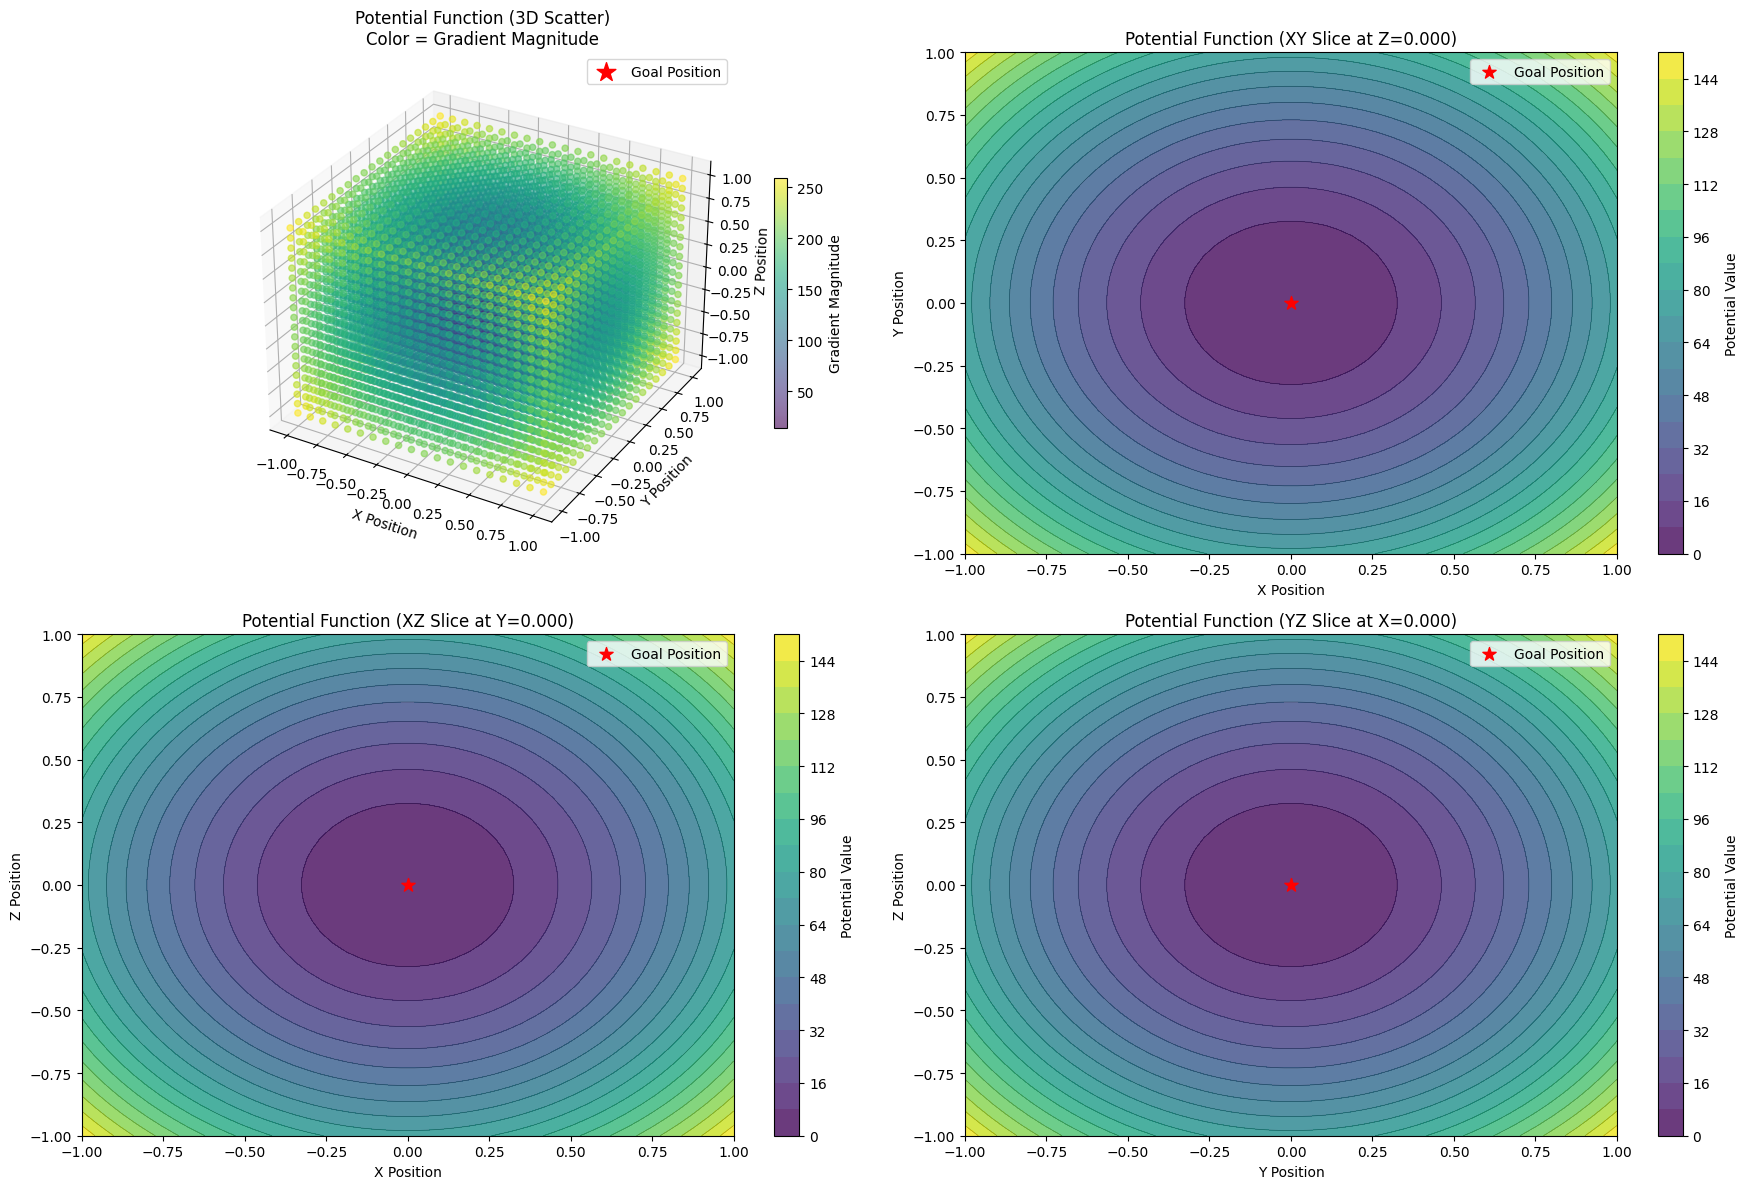

In [6]:
# Create the fixed 3D plot
print("Creating fixed 3D potential function visualization...")
fig1 = create_3d_potential_plot_fixed()

In [7]:
# Create 3D force field visualization
def create_3d_force_field_visualization():
    """Create a 3D quiver plot showing the force field (negative gradient)."""
    # Create a 3D grid
    x_range = np.linspace(goal_pos[0] - 0.15, goal_pos[0] + 0.15, 15)
    y_range = np.linspace(goal_pos[1] - 0.15, goal_pos[1] + 0.15, 15)
    z_range = np.linspace(goal_pos[2] - 0.15, goal_pos[2] + 0.15, 15)
    X, Y, Z = np.meshgrid(x_range, y_range, z_range, indexing='ij')
    
    # Compute force field (negative gradient)
    grad_values = grad_func(X, Y, Z)
    Fx = -grad_values[0]  # Force in x direction
    Fy = -grad_values[1]  # Force in y direction
    Fz = -grad_values[2]  # Force in z direction
    
    # Compute force magnitude for coloring
    force_magnitude = np.sqrt(Fx**2 + Fy**2 + Fz**2)
    
    # Create the 3D plot
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create colored arrows by plotting individual arrows
    # Normalize force magnitude for color mapping
    norm = Normalize(vmin=force_magnitude.min(), vmax=force_magnitude.max())
    colors = cm.viridis(norm(force_magnitude))
    
    # Plot individual arrows with colors
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            for k in range(X.shape[2]):
                # Get the color for this arrow
                color = colors[i, j, k]
                
                # Plot the arrow as a line from start to end point
                start_x, start_y, start_z = X[i, j, k], Y[i, j, k], Z[i, j, k]
                end_x = start_x + Fx[i, j, k] * 0.02  # Scale arrow length
                end_y = start_y + Fy[i, j, k] * 0.02
                end_z = start_z + Fz[i, j, k] * 0.02
                
                ax.plot([start_x, end_x], [start_y, end_y], [start_z, end_z], 
                       color=color, alpha=0.8, linewidth=2)
    
    # Add goal position marker
    ax.scatter([goal_pos[0]], [goal_pos[1]], [goal_pos[2]], 
              color='red', s=200, label='Goal Position', marker='*')
    
    # Set labels and title
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_zlabel('Z Position')
    ax.set_title('3D Force Field Visualization\nArrow Color = Force Magnitude')
    ax.legend()
    
    # Create a colorbar using a dummy scatter plot
    dummy_scatter = ax.scatter([], [], c=[], cmap='viridis', s=0)
    cbar = plt.colorbar(dummy_scatter, ax=ax, shrink=0.5, aspect=20)
    cbar.set_label('Force Magnitude')
    
    # Set equal aspect ratio for better visualization
    ax.set_box_aspect([1,1,1])
    
    plt.tight_layout()
    plt.show()
    
    return fig

Creating 3D force field visualization...


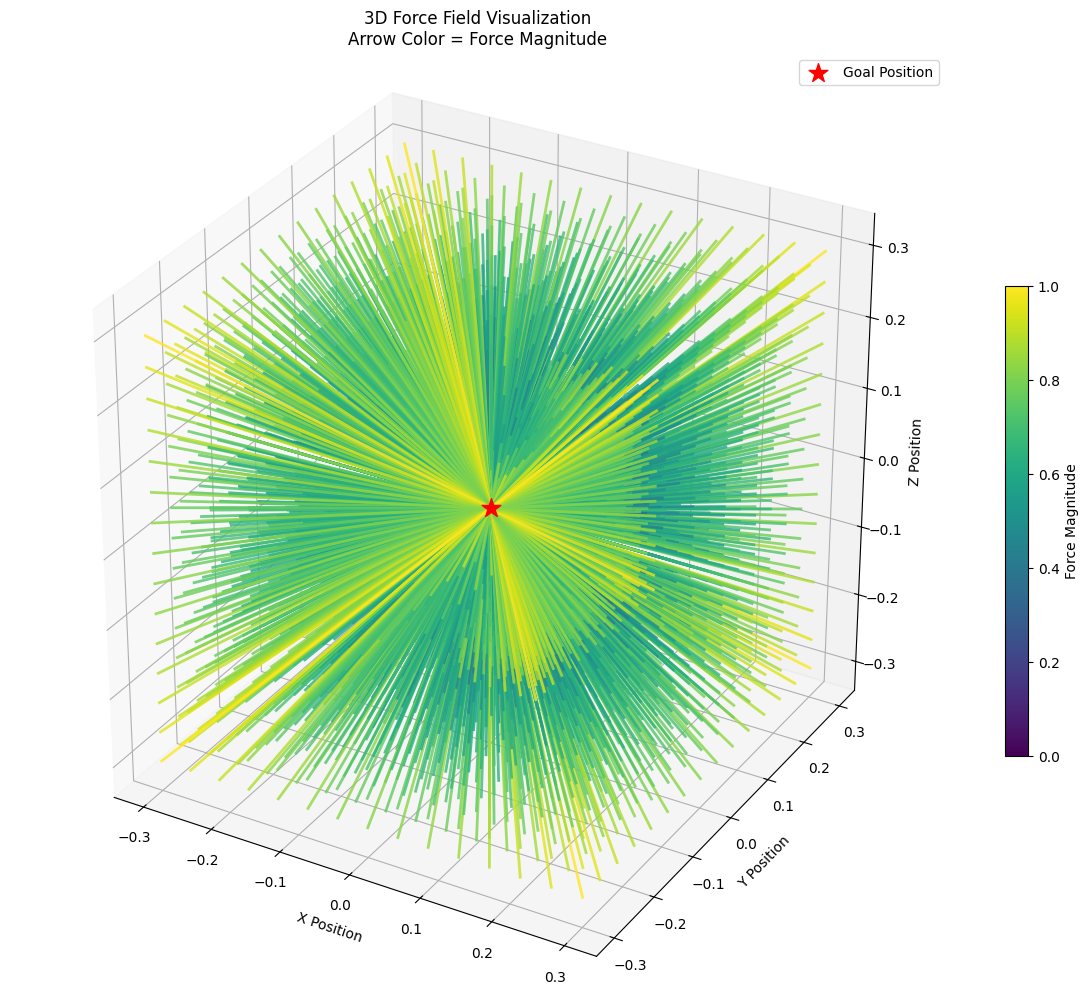

In [8]:
# Create 3D force field visualization
print("Creating 3D force field visualization...")
fig2 = create_3d_force_field_visualization()

In [9]:
# Visualize the paraboloid surface to show the conical shape
def plot_paraboloid_surface():
    """Plot the paraboloid surface that defines our potential function."""
    # Define paraboloid parameters (in case they're not in scope)
    a_param = 1.0  # Paraboloid curvature parameter
    b_param = 1.0  # Paraboloid curvature parameter
    
    # Create a larger grid for the paraboloid to show the conical shape
    x_range = np.linspace(-0.5, 0.5, 50)
    y_range = np.linspace(-0.5, 0.5, 50)
    X_surf, Y_surf = np.meshgrid(x_range, y_range)
    Z_surf =  ( a_param * X_surf**2 + b_param * Y_surf**2)
    
    # Create the plot
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Compute gradient magnitude for coloring
    # For points on the paraboloid surface, compute the gradient of the potential function
    alpha_param = 100.0  # Potential field strength
    
    # Compute the potential function at points on the surface
    # Distance from point to paraboloid (this will be 0 on the surface)
    distance_to_paraboloid = (Z_surf - Z_surf)**2  # This is 0 on the surface
    
    # To get meaningful gradient, compute at points slightly off the surface
    epsilon = 0.01
    Z_above = Z_surf + epsilon
    Z_below = Z_surf - epsilon
    
    # Compute potential at these points
    U_above = alpha_param * (Z_above - Z_surf)**2
    U_below = alpha_param * (Z_below - Z_surf)**2
    
    # Approximate gradient magnitude as the difference
    gradient_magnitude = np.abs(U_above - U_below) / (2 * epsilon)
    
    # Alternative: compute gradient based on distance from center
    distance_from_center = np.sqrt(X_surf**2 + Y_surf**2)
    gradient_magnitude = distance_from_center  # Stronger gradient farther from center
    
    # Plot the paraboloid surface colored by gradient magnitude
    surf = ax.plot_surface(X_surf, Y_surf, Z_surf, 
                          facecolors=cm.viridis(Normalize()(gradient_magnitude)),
                          alpha=0.8, linewidth=0, antialiased=True)
    
    # Add contour lines to show the shape better
    ax.contour(X_surf, Y_surf, Z_surf, zdir='z', offset=0, cmap='viridis', alpha=0.5)
    
    # Add goal position marker (center of paraboloid)
    ax.scatter([goal_pos[0]], [goal_pos[1]], [goal_pos[2]], 
              color='red', s=200, label='Goal Position', marker='*')
    
    # Set labels and title
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_zlabel('Z Position')
    ax.set_title(f'Paraboloid Surface: z = {a_param}*x² + {b_param}*y²\nColor = Gradient Magnitude')
    ax.legend()
    
    # Set equal aspect ratio to show the true shape
    ax.set_box_aspect([1,1,1])
    
    # Set axis limits to show the full conical shape
    ax.set_xlim(-0.5, 0.5)
    ax.set_ylim(-0.5, 0.5)
    ax.set_zlim(-0.5, 0.5)
    
    # Add colorbar
    cbar = plt.colorbar(surf, ax=ax, shrink=0.5, aspect=20)
    cbar.set_label('Gradient Magnitude')
    
    plt.tight_layout()
    plt.show()
    
    return fig

Creating paraboloid surface visualization...


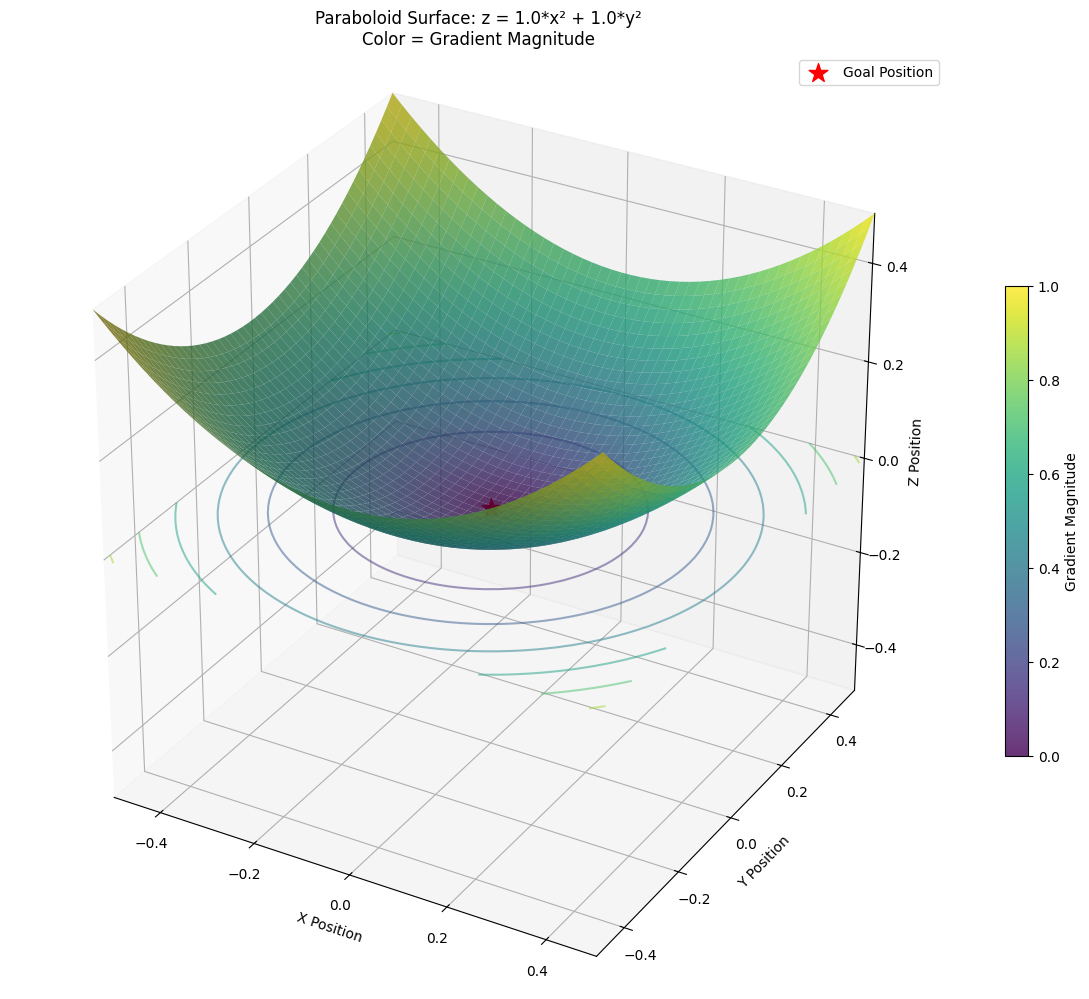

In [10]:
# Plot the paraboloid surface
print("Creating paraboloid surface visualization...")
fig_paraboloid = plot_paraboloid_surface()

In [11]:
alpha = 1.0
beta = 1.0

d_star = None
Q = {(0.0, 0.0, 0.0): (0.1, 0.25)}

In [12]:
def distance(p, g):
    return np.sqrt((p[0] - g[0])**2 + (p[1] - g[1])**2 + (p[2] - g[2])**2)

def u_att(p, g, d_star=None):
    if d_star:
        if distance(p, g) <= d_star:
            return alpha * 1/2 * distance(p, g)**2
        else:
            return d_star*alpha*distance(p, g) - alpha*d_star**2
    
    return alpha * 1/2 * distance(p, g)**2

def grad_u_att(p, g, d_star=None):
    if d_star:
        if distance(p, g) <= d_star:
            return alpha * (p - g)
        else:
            return d_star*alpha*(p - g)/distance(p, g)
    
    return alpha * (p - g)

def u_rep(p, Q: dict):
    rep_force = 0
    for q, values in Q.items():
        R, Qistar = values
        Dq = distance(p, q)
        if Dq > Qistar:
            rep_force += 0
        else:
            rep_force += 0.5* beta * (1/Dq - 1/Qistar)**2
    return rep_force

def grad_u_rep(p, Q: dict):
    grad_rep_force = np.zeros(3)

    for q, values in Q.items():
        R, Qistar = values
        vx = p[0] - q[0]
        vy = p[1] - q[1]
        vz = p[2] - q[2]
        Dq = distance(p, q)
        if Dq <= Qistar:
            cx, cy, cz = q[0] + R/Dq*vx, q[1] + R/Dq*vy, q[2] + R/Dq*vz
            grad_rep_force += np.array([(q[0] - cx)/Dq, (q[1] - cy)/Dq, (q[2] - cz)/Dq])

    return grad_rep_force

def u_total(p, g, Q: dict, d_star=None):
    return u_att(p, g, d_star) + u_rep(p, Q)

def grad_u_total(p, g, Q: dict, d_star=None):
    return grad_u_att(p, g, d_star) + grad_u_rep(p, Q)

In [13]:
goal_pos = np.array([0.0, 0.0, 0.0])
test = np.array([0.1, 0.1, 0.1])

print(u_att(test, goal_pos))

print(u_total(test, goal_pos, Q))
print(grad_u_total(test, goal_pos, Q))

0.015000000000000005
1.5876558990816338
[-0.23333333 -0.23333333 -0.23333333]


In [14]:
from potential_field import PotentialField3D

xbounds = (-0.5, 0.5)
ybounds = (-0.5, 0.5)
zbounds = (-0.5, 0.5)
resolution = 100

alpha = 1.0
beta = 1.0

d_star = None
Q = {(0.0, 0.0, 0.0): (0.1, 0.25)}
goal_pos = np.array([0.0, 0.0, 0.0])

field = PotentialField3D(xbounds, ybounds, zbounds, resolution, alpha, u_total, beta, grad_u_total, Q, goal_pos, d_star)

Computing field for 100×100×100 grid...


In [15]:
field.get_both((0.2, 0.3, 0.1))

(array(0.07003112), array([0.2, 0.3, 0.1]))

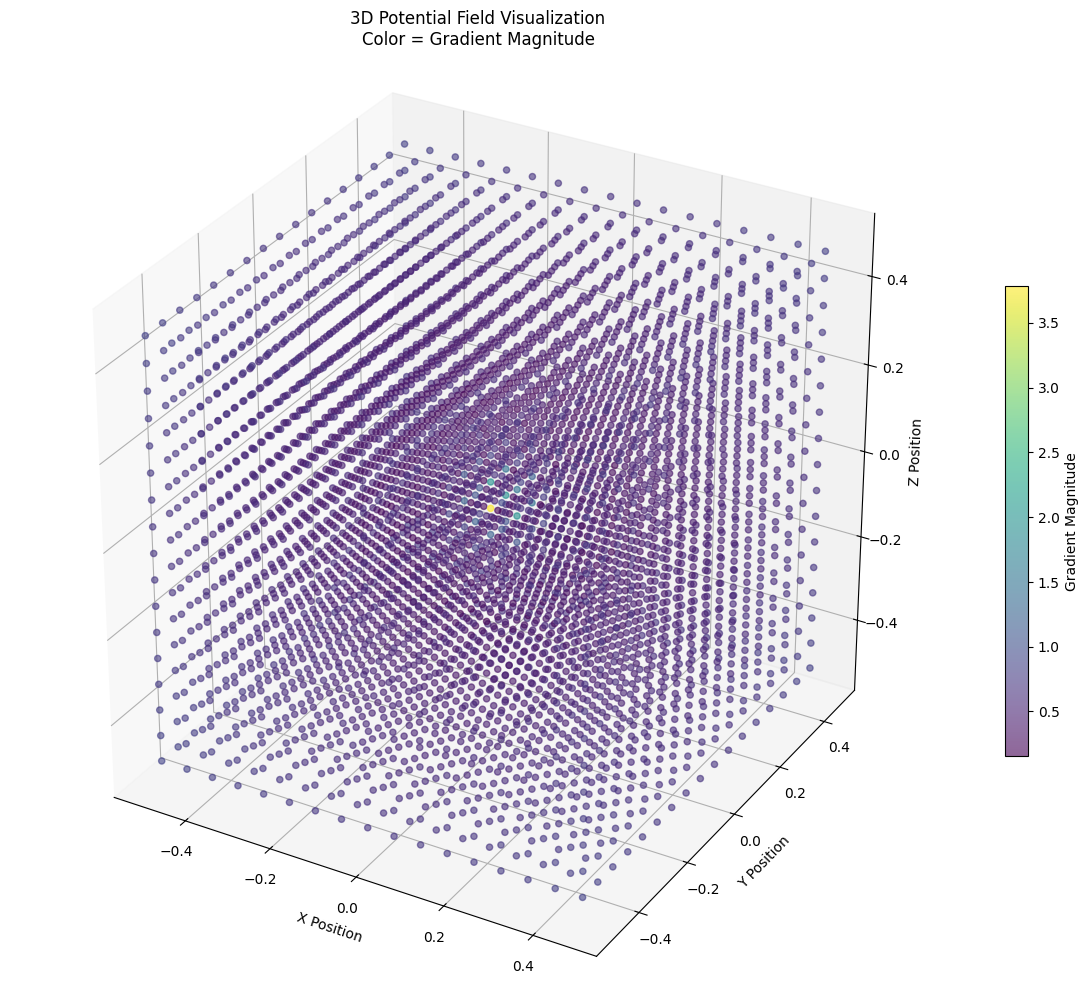

In [16]:
field.visualize(color_by='gradient_magnitude', subsample=6);

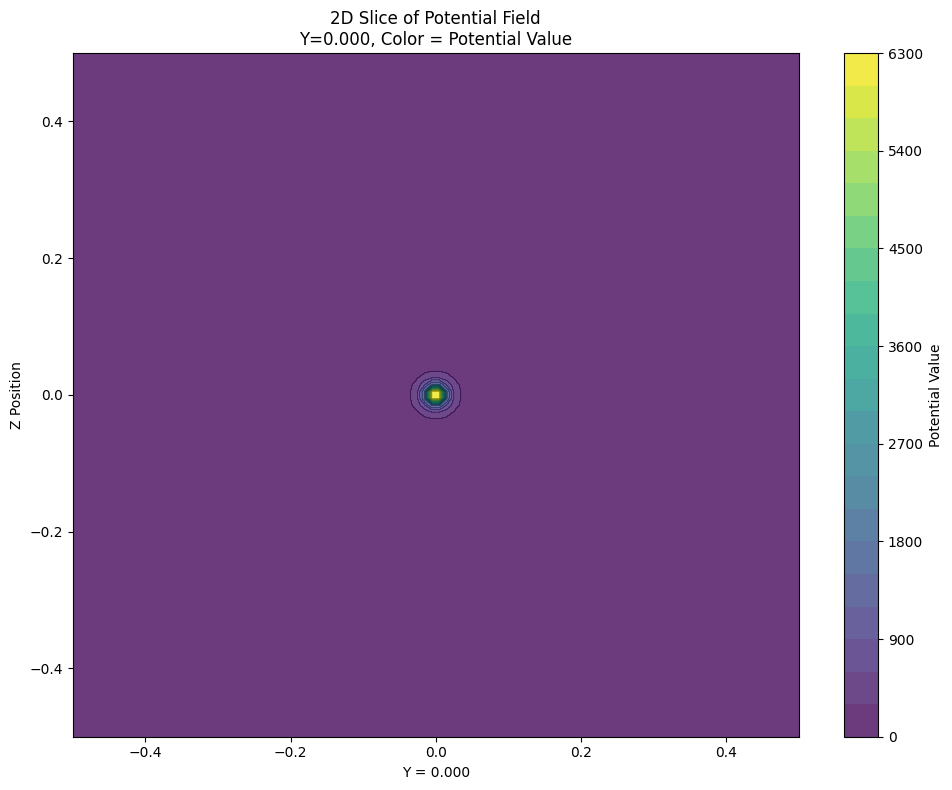

In [17]:
field.visualize_surface_slice(slice_axis='y', slice_value=0.0, color_by='potential');